In [1]:
import pandas as pd

# The Palmer Archipelago Penguin Data

<img src="cute_penguins.png" alt="Drawing" style="width: 500px;"/>

Art by @allison_horst

In [3]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.
This dataset contains data for 344 penguins.
There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

In [4]:
data.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

The culmen is the upper ridge of a bird’s bill. For this penguin data, the culmen (bill) length and depth are measured as shown below.

<img src="culmen_depth.png" alt="Drawing" style="width: 500px;"/>

The **goal** is to predict the penguin species from physical measurements (culmen length, culmen depth, flipper length, and body mass). 

**Part 1:** Import and instantiate a k-nearest neighbors model.

In [8]:
# your  code here
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()


**Part 2:** Define the feature matrix X and the target vector y from the dataframe, and then split X and y into training and testing sets.

In [28]:
# your  code here
from sklearn.model_selection import train_test_split
X = data.drop('species', axis=1)
y = data.species
X_train, X_test, y_train, y_test = train_test_split(X,y)

**Part 3:** Build a pipeline that consists of two steps: an imputer (to fill missing values with the mean value) and the knn classifier.

In [61]:
numerical_features=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = ['sex']


In [86]:
# your  code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', numerical_processor, numerical_features),
    ('cat_processor', categorical_processor, categorical_features)
])

pipe = Pipeline(steps=[
    ('processor', feature_processor),
    ('clf', KNeighborsClassifier(n_neighbors=10))
])
pipe

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['culmen_length_mm',
                                                   'culmen_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['sex'])])),
                ('clf', KNeighborsClassifier(n_neighbors=10))])

In [67]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['culmen_length_mm',
                                                   'culmen_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['sex'])])),
                ('clf', KNeighborsClassifier(n_neighbors=10))])

**Part 4:** Use a grid search to tune in the `n_neighbors` and `weights` hyperparameters

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>  The Palmer Archipelago Penguin Data is relatively small.
    Don't use a large value for the <tt> cv </tt> parameter</p> (Javier would use <tt> cv=5</tt>.)
</div>

In [71]:
# your  code here
from sklearn.model_selection import GridSearchCV
param_dic = {'clf__n_neighbors':[5,10,20,40,80,160], 'clf__weights':['uniform', 'distance']}
grid = GridSearchCV(pipe, param_dic, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['culmen_length_mm',
                                                                          'culmen_depth_mm',
                                                                          'flipper_length_mm',
                                                                          'body_mass_g']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['sex'])])),
                                       ('clf',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid={'clf__n_neighbors': [5, 10, 20, 40, 80, 160],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy')

**Part 5:** Use accuracy and the confusion matrix to evaluate the performance of your best model on the test set

In [74]:
# your  code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

0.8023255813953488

In [ ]:
# accuracy
y_test_pred = grid.predict(X_test)
accuracy_score(y_test_pred, y_test)

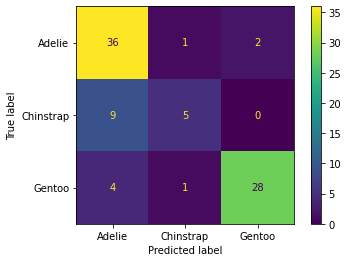

In [75]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

<div class="alert alert-block alert-danger"> <tt>KNeighborsClassifier </tt> is a distance based model. Distance based models are affected by the scale of the features. They give higher weightage to features which have higher magnitude (The <tt>body_mass_g</tt> feature in our case).
We do not want our classifier to be affected by the magnitude of the features. To overcome this problem, we can bring down all the variables to the same scale. </div>

**Part 6:** Add a `StandardScaler` to your pipeline, and repeat steps 4 and 5.

In [78]:
# setup standardscaler in pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
numerical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', numerical_processor, numerical_features),
    ('cat_processor', categorical_processor, categorical_features)
])

pipe = Pipeline(steps=[
    ('processor', feature_processor),
    ('clf', KNeighborsClassifier(n_neighbors=10))
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['culmen_length_mm',
                                                   'culmen_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['sex'])])),
                ('clf', KNeighborsClassifier(n_neighbors=10))])

In [80]:
# step 4
param_dic = {'clf__n_neighbors':[5,10,20,40,80,160], 'clf__weights':['uniform', 'distance']}
grid = GridSearchCV(pipe, param_dic, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\Derric

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['culmen_length_mm',
                                                                          'culmen_depth_mm',
                                                                          'flipper_length_mm',
                                                                          'body_mass_g']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['sex'])])),
                                       ('clf',
                                        KNeighborsClassifier(n_neighbors=10))]),
             param_grid={'clf__n_neighbors': [5, 10, 20, 40, 80, 160],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [81]:
# accuracy 
y_test_pred = grid.predict(X_test)
accuracy_score(y_test_pred, y_test)
# Whoa, 100% accuarcy?

1.0

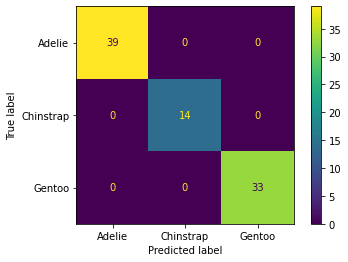

In [82]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [ ]:
# step 5